In [22]:
!pip install AdvancedAnalytics

import pandas as pd
import numpy  as np
import statsmodels.api as sm
import statsmodels.tools.eval_measures as em
from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
from AdvancedAnalytics.Regression          import logreg, stepwise
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, recall_score
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)

In [23]:
attribute_map = {
    'Respondent': [DT.Ignore, ()],  # Respondent ID should be ignored in analysis
    'Purchase':   [DT.Binary, (0, 1)],  # Purchase is binary: 1 for purchase made, 0 for no purchase
    'OverallSAT': [DT.Ordinal, (1, 2, 3, 4, 5, 6, 7)],  # Overall satisfaction is ordinal (scale of 1-7)
    'Education':  [DT.Nominal, (1, 2, 3)],  # Education level is nominal categorical
    'Gender':     [DT.Binary, (0, 1)],  # Gender is binary (0 = Male, 1 = Female)
    'Age':        [DT.Nominal, (1, 2, 3)]  # Age is nominal categorical (three groups)
}



In [24]:
target = 'Purchase'
df = pd.read_excel('/content/Logistic Regression For Customer Insights Data.xlsx',sheet_name=0)
df.head()
rie = ReplaceImputeEncode(data_map=attribute_map, binary_encoding = 'one-hot',
                          nominal_encoding='one-hot', no_impute=[target],
                          drop=True, display=True)
encoded_df = rie.fit_transform(df)



********** Data Preprocessing ***********
Features Dictionary Contains:
0 Interval, 
2 Binary, 
2 Nominal, and 
2 Excluded Attribute(s).

Data contains 1900 observations & 6 columns.


Attribute Counts
................. Missing  Outliers
Respondent..         0         0
Purchase....         0         0
OverallSAT..         0         0
Education...         0         0
Gender......         0         0
Age.........         0         0


In [25]:
display(encoded_df)

,Purchase,Gender,Education1,Education2,Age1,Age2
0,1,0,0,0,0,0
1,1,1,1,0,0,0
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
1895,1,1,1,0,1,0
1896,0,0,0,1,1,0
1897,1,0,0,0,1,0
1898,0,0,0,1,1,0


In [26]:
# Set the target variable and feature variables
target = 'Purchase'
X = encoded_df.drop(columns=[target])  # Independent variables (features)
y = encoded_df[target]  # Dependent variable (target)

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.678244
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                 1900
Model:                          Logit   Df Residuals:                     1894
Method:                           MLE   Df Model:                            5
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                0.005870
Time:                        18:56:45   Log-Likelihood:                -1288.7
converged:                       True   LL-Null:                       -1296.3
Covariance Type:            nonrobust   LLR p-value:                  0.009468
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1013      0.190     -0.532      0.594      -0.474       0.272
Gender        -0.0635      0.

 Pseudo R-squared: 0.005870
Definition: The Pseudo R-squared in logistic regression is a measure of how well the model explains the variation in the dependent variable. It is analogous to R-squared in linear regression but does not have the same interpretation. In logistic regression, the pseudo R-squared is often much lower than in linear regression.

Interpretation: A pseudo R-squared value of 0.005870 suggests that the model explains very little of the variability in the outcome (Purchase). The model’s predictive power is low. However, pseudo R-squared values are typically low in logistic regression models, especially when the data is complex.

2. Log-Likelihood: -1288.7
Definition: The log-likelihood measures how well the model fits the data. It represents the likelihood of observing the given data under the model. Higher (less negative) values of the log-likelihood indicate a better fit.

Interpretation: The log-likelihood of -1288.7 means that the model does not fit the data particularly well. Compared to the null model's log-likelihood (LL-Null = -1296.3), the difference is not substantial. The improvement of the model over the null model is marginal, as indicated by the low pseudo R-squared value.

3. Coefficients (coef)
Definition: The coefficients represent the log-odds of the dependent variable (Purchase) being 1 (purchase made) for a one-unit increase in the predictor variable, holding all other variables constant.

Interpretation:

Intercept (const): -0.1013

The intercept indicates the log-odds of making a purchase when all the independent variables are zero. In this case, it's not statistically significant (
𝑝
=
0.594
p=0.594), meaning the baseline probability of purchasing is not significantly different from 0.
Gender: -0.0635 (
𝑝
=
0.509
p=0.509)

The coefficient for Gender is negative, suggesting that being female (assuming 1 = female) slightly decreases the log-odds of making a purchase, but this result is not statistically significant (
𝑝
=
0.509
p=0.509). This means gender does not have a meaningful impact on purchase behavior.
Education1: 0.3684 (
𝑝
=
0.018
p=0.018)

For respondents with Education Level 1 (likely high school), the log-odds of making a purchase increase by 0.3684 compared to the reference group (likely Education Level 3). This coefficient is statistically significant (
𝑝
=
0.018
p=0.018), indicating that lower education levels are associated with higher purchase rates, compared to the baseline education level.
Education2: 0.1688 (
𝑝
=
0.298
p=0.298)

For respondents with Education Level 2 (likely undergraduate degree), the log-odds of making a purchase increase by 0.1688 compared to the reference group (likely Education Level 3). However, this result is not statistically significant (
𝑝
=
0.298
p=0.298), meaning that this education level does not have a strong impact on the likelihood of purchasing.
Age1: -0.1642 (
𝑝
=
0.474
p=0.474)

For respondents in Age Group 1 (likely younger individuals), the log-odds of making a purchase decrease by 0.1642 compared to the reference age group (likely Age 3). This coefficient is not statistically significant (
𝑝
=
0.474
p=0.474), indicating no meaningful effect of being in the younger age group on purchasing behavior.
Age2: 0.2130 (
𝑝
=
0.136
p=0.136)

For respondents in Age Group 2 (likely middle-aged individuals), the log-odds of making a purchase increase by 0.2130 compared to the reference age group (likely Age 3). This result is not statistically significant (
𝑝
=
0.136
p=0.136), suggesting that age in this group does not have a strong impact on purchase decisions.

In [27]:
# Define target and features
target = 'Purchase'
X = encoded_df.drop(columns=[target])  # Independent variables
y = encoded_df[target]  # Dependent variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_model.predict(X_test)


In [31]:
# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe to display the metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall (Sensitivity)", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# Print the confusion matrix and the metrics table
print("Confusion Matrix:")
print('\n')
print(conf_matrix)
print("\nModel Metrics:")
print(metrics_df)


Confusion Matrix:


[[ 17 224]
 [ 24 305]]

Model Metrics:
                 Metric     Score
0              Accuracy  0.564912
1             Precision  0.576560
2  Recall (Sensitivity)  0.927052
3              F1 Score  0.710956


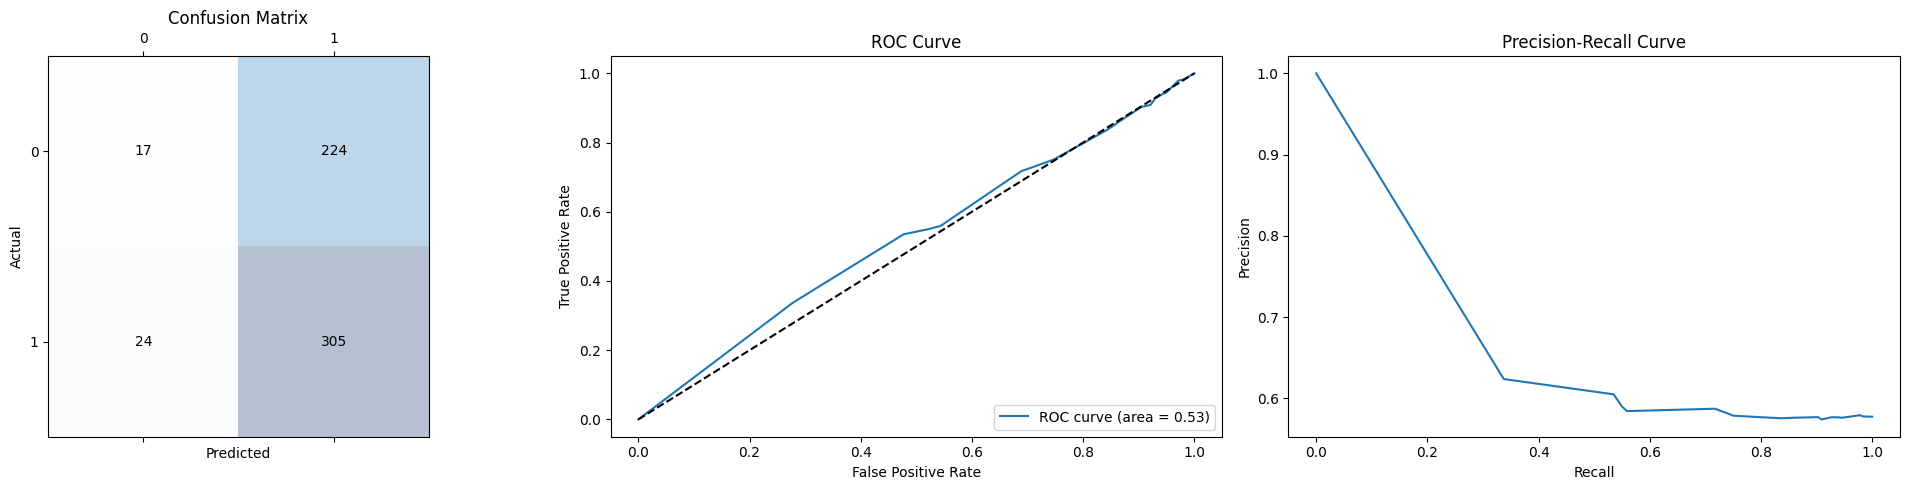

In [34]:
# Predict probabilities for the test set
y_pred_prob = log_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
ax[0].matshow(conf_matrix, cmap='Blues', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax[0].text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
ax[1].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")

# Precision-Recall Curve Plot
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
ax[2].plot(recall, precision, label='Precision-Recall curve')
ax[2].set_title('Precision-Recall Curve')
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precision')

# Show all plots
plt.tight_layout()
plt.show()


1. Accuracy: 0.564912
Definition: Accuracy is the ratio of correctly predicted observations to the total observations.


Interpretation: An accuracy of 56.49% means that the model correctly predicted the outcome 56.49% of the time. However, accuracy can be misleading if the dataset is imbalanced, which means you should also look at other metrics like precision, recall, and F1 score to understand the model's performance more fully.
2. Precision: 0.576560
Definition: Precision (also called Positive Predictive Value) is the ratio of correctly predicted positive observations to the total predicted positives.
Precision

​

Interpretation: A precision of 57.66% means that, of all the instances the model predicted as positive (e.g., a "purchase"), only 57.66% were actually positive. In other words, about 42.34% of the positive predictions were false positives. Precision is important when the cost of false positives is high (e.g., in medical diagnoses or fraud detection).
3. Recall (Sensitivity): 0.927052
Definition: Recall (also called Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all actual positives.


Interpretation: A recall of 92.71% means that the model correctly identified 92.71% of the actual positive instances (e.g., "purchases"). This suggests that the model is very good at identifying the true positives and has a low rate of false negatives. Recall is important in scenarios where missing positive cases (false negatives) has a high cost, such as in medical testing or fraud detection.
4. F1 Score: 0.710956
Definition: The F1 score is the harmonic mean of precision and recall. It balances the two metrics and is useful when there is an uneven class distribution or when you want to weigh both false positives and false negatives.


Interpretation: An F1 score of 71.10% means that the model has a reasonable balance between precision and recall. The F1 score is a useful measure when you want to account for both false positives and false negatives, making it a good overall indicator of the model's performance.
Overall Interpretation:
The model has high recall (92.71%), meaning it is very good at identifying true positives, but its precision is relatively lower (57.66%), indicating that there are a fair number of false positives. This suggests that the model may be over-predicting the positive class (predicting "purchase" more often than it should).
The accuracy of 56.49% seems low, but accuracy alone is not a reliable metric in imbalanced datasets or when the cost of different types of errors (false positives vs. false negatives) differs.
The F1 score (71.10%) balances precision and recall, showing that while the model has strong recall, there is room for improvement in reducing false positives to improve precision.